<a href="https://colab.research.google.com/github/Vignesh424/Flight-Fare/blob/main/FlightFarePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize':(10,6)})

# **Importing dataset**

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading we can check the complete information of data like many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done:-

Imputing data using Imputation method in sklearn
Filling NaN values with mean, median and mode using fillna() method

Describe data --> which can give statistical analysis

In [ ]:
train_data = pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Adults,Children,Infants,Journey Type,Additional_Info,Date_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,1,0,0,One Way,No info,2019-03-24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,0,0,One Way,No info,2019-05-01
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,1,0,0,Roundtrip,In-flight meal not included,2019-06-09
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,1,0,0,One Way,No info,2019-05-12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,0,0,Roundtrip,No info,2019-03-01


In [ ]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10689 non-null  object        
 1   Source           10689 non-null  object        
 2   Destination      10689 non-null  object        
 3   Route            10689 non-null  object        
 4   Dep_Time         10689 non-null  object        
 5   Arrival_Time     10689 non-null  object        
 6   Duration         10689 non-null  object        
 7   Total_Stops      10689 non-null  object        
 8   Price            10689 non-null  int64         
 9   Adults           10689 non-null  int64         
 10  Children         10689 non-null  int64         
 11  Infants          10689 non-null  int64         
 12  Journey Type     10689 non-null  object        
 13  Additional_Info  10689 non-null  object        
 14  Date_of_Journey  10689 non-null  datet

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Adults,Children,Infants,Journey Type,Additional_Info,Date_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,1,0,0,One Way,No info,2019-03-24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,0,0,One Way,No info,2019-05-01
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,1,0,0,Roundtrip,In-flight meal not included,2019-06-09
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,1,0,0,One Way,No info,2019-05-12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,0,0,Roundtrip,No info,2019-03-01


In [ ]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
Adults             0
Children           0
Infants            0
Journey Type       0
Additional_Info    0
Date_of_Journey    0
dtype: int64

In [ ]:
train_data.dropna(inplace=True, how='all')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10689 non-null  object        
 1   Source           10689 non-null  object        
 2   Destination      10689 non-null  object        
 3   Route            10689 non-null  object        
 4   Dep_Time         10689 non-null  object        
 5   Arrival_Time     10689 non-null  object        
 6   Duration         10689 non-null  object        
 7   Total_Stops      10689 non-null  object        
 8   Price            10689 non-null  int64         
 9   Adults           10689 non-null  int64         
 10  Children         10689 non-null  int64         
 11  Infants          10689 non-null  int64         
 12  Journey Type     10689 non-null  object        
 13  Additional_Info  10689 non-null  object        
 14  Date_of_Journey  10689 non-null  datet

In [ ]:
train_data.describe()

,Price,Adults,Children,Infants
count,10689.000000,10689.000000,10689.000000,10689.000000
mean,9087.030779,1.012630,0.132847,0.079521
std,4613.108416,0.111676,0.339425,0.270563
min,1759.000000,1.000000,0.000000,0.000000
25%,5277.000000,1.000000,0.000000,0.000000
50%,8372.000000,1.000000,0.000000,0.000000
75%,12373.000000,1.000000,0.000000,0.000000
max,79512.000000,2.000000,1.000000,1.000000


In [ ]:
train_data.shape

(10689, 15)

# **EDA**

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.



In [ ]:
#Date of Journey
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [ ]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
train_data["Dep_Time"] = pd.to_datetime(train_data["Dep_Time"],errors='coerce')
train_data["Dep_Time"] = train_data["Dep_Time"].dt.strftime('%H:%M')

In [ ]:
#Departure Hours and Minutes
train_data["Dep_Hours"] = pd.to_datetime(train_data["Dep_Time"],errors='coerce')
train_data["Dep_Hours"] = train_data["Dep_Hours"].dt.strftime('%H')
#take the modal value
x = train_data["Dep_Hours"].mode().iat[0]
train_data['Dep_Hours'].fillna(x)

0        22
1        05
2        09
3        18
4        16
         ..
10684    09
10685    09
10686    09
10687    09
10688    09
Name: Dep_Hours, Length: 10689, dtype: object

In [ ]:
train_data["Dep_Minutes"] = pd.to_datetime(train_data["Dep_Time"],errors='coerce')
train_data["Dep_Minutes"] = train_data["Dep_Minutes"].dt.strftime('%M')
#take the modal value
y = train_data["Dep_Minutes"].mode().iat[0]
train_data['Dep_Minutes'].fillna(y)

0        20
1        50
2        25
3        05
4        50
         ..
10684    00
10685    00
10686    00
10687    00
10688    00
Name: Dep_Minutes, Length: 10689, dtype: object

In [ ]:
d = train_data["Dep_Hours"].mode().iat[0]
d = int(d)
train_data['Dep_Hours'].fillna(int(d))
train_data['Dep_Hours'] = train_data['Dep_Hours'].astype('float').astype('Int64')

In [ ]:
e = train_data["Dep_Minutes"].mode().iat[0]
e = int(e)
train_data['Dep_Minutes'].fillna(int(e))
train_data['Dep_Minutes'] = train_data['Dep_Minutes'].astype('float').astype('Int64')

In [ ]:
#convert Dep_Hour and Minutes to datetime
#Extracting Hours
train_data["Dep_Hours"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_Minutes"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [ ]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
train_data["Arrival_Time"] = pd.to_datetime(train_data["Arrival_Time"],errors='coerce')
train_data["Arrival_Time"] = train_data["Arrival_Time"].dt.strftime('%H:%M')

In [ ]:
#Arrival Hours from Arrival Time
train_data["Arrival_Hours"] = pd.to_datetime(train_data["Arrival_Time"],errors='coerce')
train_data["Arrival_Hours"] = train_data["Arrival_Hours"].dt.strftime('%H')
#take the modal value
a = train_data["Arrival_Hours"].mode().iat[0]
train_data['Arrival_Hours'].fillna(a)

0        01
1        13
2        04
3        23
4        21
         ..
10684    19
10685    19
10686    04
10687    04
10688    19
Name: Arrival_Hours, Length: 10689, dtype: object

In [ ]:
#Arrival Minutes from Arrival Time
train_data["Arrival_Minutes"] = pd.to_datetime(train_data["Arrival_Time"],errors='coerce')
train_data["Arrival_Minutes"] = train_data["Arrival_Minutes"].dt.strftime('%M')
#take the modal value
b = train_data["Arrival_Minutes"].mode().iat[0]
train_data['Arrival_Minutes'].fillna(b)

0        10
1        15
2        25
3        30
4        35
         ..
10684    00
10685    00
10686    25
10687    25
10688    00
Name: Arrival_Minutes, Length: 10689, dtype: object

In [ ]:
d = train_data["Arrival_Hours"].mode().iat[0]
d = int(d)
train_data['Arrival_Hours'].fillna(int(d))
train_data['Arrival_Hours'] = train_data['Arrival_Hours'].astype('float').astype('Int64')

In [ ]:
e = train_data["Arrival_Minutes"].mode().iat[0]
e = int(e)
train_data['Arrival_Minutes'].fillna(int(e))
train_data['Arrival_Minutes'] = train_data['Arrival_Minutes'].astype('float').astype('Int64')

In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

#Extracting Hours
train_data["Arrival_Hours"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes
train_data["Arrival_Minutes"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [ ]:
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
#convert passsenger data columns from float to int
train_data["Adults"]=train_data["Adults"].astype(int)
train_data["Children"]=train_data["Children"].astype(int)
train_data["Infants"]=train_data["Infants"].astype(int)

In [ ]:
# Time taken by plane to reach destination is called Duration
# It is actually the differnce between Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
    else:
      duration[i] = "0h " + duration[i]           # Adds 0 hour


In [ ]:
#Cleaning Duration Column and creation of 2 new columns
Duration_hours = []
Duration_mins = []
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    Duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [ ]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = Duration_hours
train_data["Duration_mins"] = Duration_mins

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Adults,Children,Infants,Journey Type,Additional_Info,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,1,0,0,One Way,No info,24,3,22.0,20.0,1.0,10.0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,0,0,One Way,No info,1,5,5.0,50.0,13.0,15.0,7,25
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,1,0,0,Roundtrip,In-flight meal not included,9,6,9.0,25.0,4.0,25.0,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,1,0,0,One Way,No info,12,5,18.0,5.0,23.0,30.0,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,0,0,Roundtrip,No info,1,3,16.0,50.0,21.0,35.0,4,45


In [ ]:
#drop duration column as it is not required
train_data.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
train_data.drop(['Additional_Info'], axis = 1 , inplace=True)

In [ ]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train_data.dropna(subset=["Dep_Hours", "Dep_Minutes", "Arrival_Hours", "Arrival_Minutes"], how="all", inplace=True)

In [ ]:
train_data.shape

(10674, 18)

# **To Handle Categorical Data**

One can find many ways to handle categorical data. Some of them categorical data are:-

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [ ]:
#Labels on bars
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

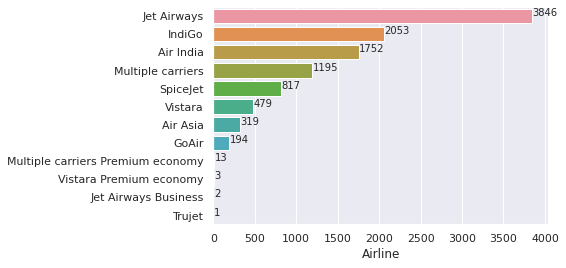

In [ ]:
#horizontal bar chart to show the count of Airlines
b = train_data["Airline"].value_counts()
a = train_data["Airline"]
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)


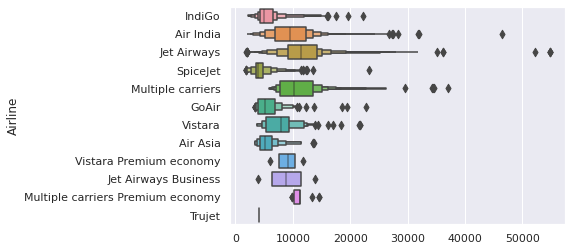

In [ ]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from Air India Alliance Airline almost all are having similar median
# Airline vs Price using Boxenplot
b = train_data["Price"].values
a = train_data["Airline"]
ax = sns.boxenplot(y=a, x=b, data=train_data)
show_values(ax)

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


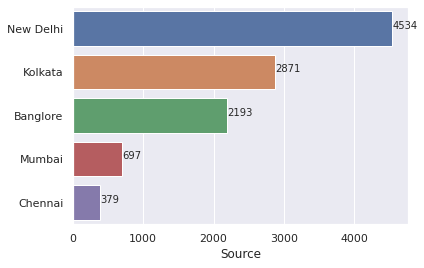

In [ ]:

#Check for  count and display using Bar chart
b = train_data["Source"].value_counts()
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)

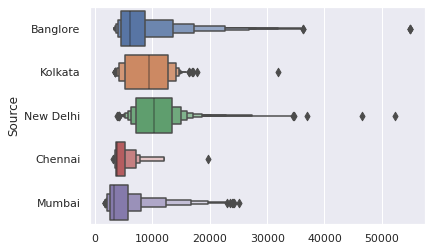

In [ ]:
# Source vs Price using Boxenplot
b = train_data["Price"].values
a = train_data["Source"]
ax = sns.boxenplot(y=a, x=b, data=train_data)
show_values(ax)

In [ ]:

# As Source is Nominal Categorical data we will perform OneHotEncoding

source = train_data["Source"]
source = pd.get_dummies(source)
source.head()

,Banglore,Chennai,Kolkata,Mumbai,New Delhi
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0


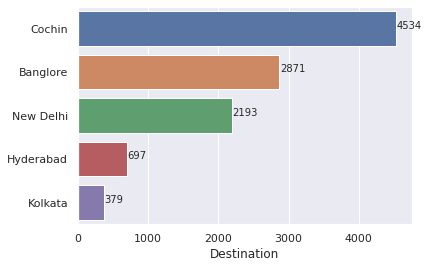

In [ ]:

#Check for  count and display using Bar chart
b = train_data["Destination"].value_counts()
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)

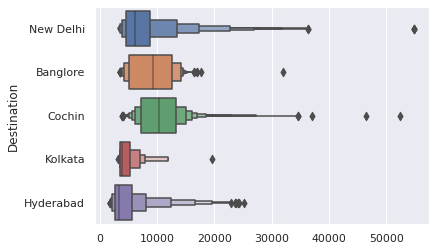

In [ ]:
# Destination vs Price using Boxenplot
b = train_data["Price"].values
a = train_data["Destination"]
ax = sns.boxenplot(y=a, x=b, data=train_data)
show_values(ax)

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

desti = train_data["Destination"]
desti = pd.get_dummies(desti)
source.head()

,Banglore,Chennai,Kolkata,Mumbai,New Delhi
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0


In [ ]:
#we remove route as it is not needed
train_data.drop(["Route"], axis = 1, inplace = True)

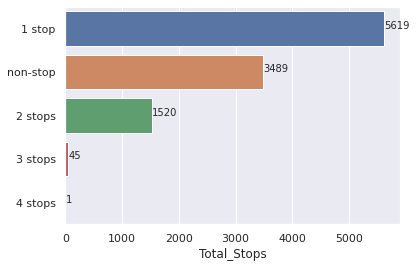

In [ ]:
#Check for count and display using Bar chart
b = train_data["Total_Stops"].value_counts()
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)

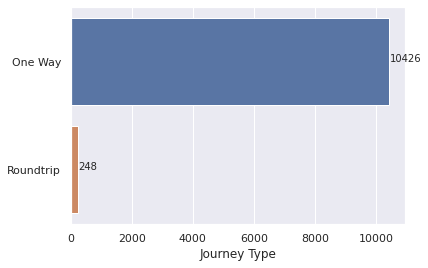

In [ ]:
#Check for count and display using Bar chart
b = train_data["Journey Type"].value_counts()
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)

In [ ]:
# As Way is Nominal Categorical data we will perform OneHotEncoding
way = train_data["Journey Type"]
way = pd.get_dummies(way)
way.head()

,One Way,Roundtrip
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [ ]:
# As this is case of Ordinal Categorical type we perform LabelEncoding
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Adults,Children,Infants,Journey Type,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,1,0,0,One Way,24,3,22.0,20.0,1.0,10.0,2,50
1,Air India,Kolkata,Banglore,2,7662,1,0,0,One Way,1,5,5.0,50.0,13.0,15.0,7,25
2,Jet Airways,New Delhi,Cochin,2,13882,1,0,0,Roundtrip,9,6,9.0,25.0,4.0,25.0,19,0
3,IndiGo,Kolkata,Banglore,1,6218,1,0,0,One Way,12,5,18.0,5.0,23.0,30.0,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,0,0,Roundtrip,1,3,16.0,50.0,21.0,35.0,4,45


In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, source, desti, way], axis = 1)
data_train['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10680    0
10681    0
10682    2
10686    2
10687    2
Name: Total_Stops, Length: 10674, dtype: int64

In [ ]:
data_train.drop(["Airline", "Source", "Destination", "Journey Type"], axis = 1, inplace = True)

In [ ]:
data_train.head()

,Total_Stops,Price,Adults,Children,Infants,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Banglore,Chennai,Kolkata,Mumbai,New Delhi,Banglore,Cochin,Hyderabad,Kolkata,New Delhi,One Way,Roundtrip
0,0,3897,1,0,0,24,3,22.0,20.0,1.0,10.0,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,2,7662,1,0,0,1,5,5.0,50.0,13.0,15.0,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,2,13882,1,0,0,9,6,9.0,25.0,4.0,25.0,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,1,6218,1,0,0,12,5,18.0,5.0,23.0,30.0,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1,13302,1,0,0,1,3,16.0,50.0,21.0,35.0,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
data_train.shape

(10674, 36)

# **Test Shape**

In [ ]:
#get the test data
test_data= pd.read_excel('/content/Test_set.xlsx')

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Adults,Children,Infants,Journey Type,Additional_Info
0,Jet Airways,6/06/2019,New Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,1,0,0,One Way,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,1,0,0,Roundtrip,No info
2,Jet Airways,21/05/2019,New Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,1,0,0,Roundtrip,In-flight meal not included
3,Kingfisher,21/05/2019,New Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,2,1,0,Roundtrip,No info
4,Air Asia,24/06/2019,Banglore,New Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,1,1,0,Roundtrip,No info


In [ ]:
# Preprocessing

print("Test data Info")
print("-"*50)
print(test_data.info())

Test data Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2692 non-null   object
 1   Date_of_Journey  2692 non-null   object
 2   Source           2692 non-null   object
 3   Destination      2692 non-null   object
 4   Route            2692 non-null   object
 5   Dep_Time         2692 non-null   object
 6   Arrival_Time     2692 non-null   object
 7   Duration         2692 non-null   object
 8   Total_Stops      2692 non-null   object
 9   Adults           2692 non-null   int64 
 10  Children         2692 non-null   int64 
 11  Infants          2692 non-null   int64 
 12  Journey Type     2692 non-null   object
 13  Additional_Info  2692 non-null   object
dtypes: int64(3), object(11)
memory usage: 294.6+ KB
None


In [ ]:
#check for null values
print("Null values :")
print("-"*50)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Null values :
--------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Adults             0
Children           0
Infants            0
Journey Type       0
Additional_Info    0
dtype: int64


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692 entries, 0 to 2691
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2692 non-null   object
 1   Date_of_Journey  2692 non-null   object
 2   Source           2692 non-null   object
 3   Destination      2692 non-null   object
 4   Route            2692 non-null   object
 5   Dep_Time         2692 non-null   object
 6   Arrival_Time     2692 non-null   object
 7   Duration         2692 non-null   object
 8   Total_Stops      2692 non-null   object
 9   Adults           2692 non-null   int64 
 10  Children         2692 non-null   int64 
 11  Infants          2692 non-null   int64 
 12  Journey Type     2692 non-null   object
 13  Additional_Info  2692 non-null   object
dtypes: int64(3), object(11)
memory usage: 315.5+ KB


In [ ]:
# EDA
# Date_of_Journey
# convert column to datetime pandas
test_data["Journey_day"] = pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
test_data["Dep_Time"] = pd.to_datetime(test_data["Dep_Time"],errors='coerce')
test_data["Dep_Time"] = test_data["Dep_Time"].dt.strftime('%H:%M')

In [ ]:
#Departure Hours and Minutes
test_data["Dep_Hours"] = pd.to_datetime(test_data["Dep_Time"],errors='coerce')
test_data["Dep_Hours"] = test_data["Dep_Hours"].dt.strftime('%H')
#take the modal value
x = test_data["Dep_Hours"].mode().iat[0]
test_data['Dep_Hours'].fillna(x)

0       17
1       06
2       19
3       08
4       23
        ..
2687    08
2688    14
2689    20
2690    16
2691    14
Name: Dep_Hours, Length: 2692, dtype: object

In [ ]:
test_data["Dep_Minutes"] = pd.to_datetime(test_data["Dep_Time"],errors='coerce')
test_data["Dep_Minutes"] = test_data["Dep_Minutes"].dt.strftime('%M')
#take the modal value
y = test_data["Dep_Minutes"].mode().iat[0]
test_data['Dep_Minutes'].fillna(y)

0       30
1       20
2       15
3       00
4       55
        ..
2687    45
2688    00
2689    15
2690    00
2691    10
Name: Dep_Minutes, Length: 2692, dtype: object

In [ ]:

#convert Dep_Hour and Minutes to datetime
#Extracting Hours
test_data["Dep_Hours"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour

# Extracting Minutes
test_data["Dep_Minutes"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

In [ ]:
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
test_data["Arrival_Time"] = pd.to_datetime(test_data["Arrival_Time"],errors='coerce')
test_data["Arrival_Time"] = test_data["Arrival_Time"].dt.strftime('%H:%M')

In [ ]:
#Arrival Hours from Arrival Time
test_data["Arrival_Hours"] = pd.to_datetime(test_data["Arrival_Time"],errors='coerce')
test_data["Arrival_Hours"] = test_data["Arrival_Hours"].dt.strftime('%H')
#take the modal value
a = test_data["Arrival_Hours"].mode().iat[0]
test_data['Arrival_Hours'].fillna(a)

0       04
1       10
2       19
3       21
4       02
        ..
2687    13
2688    12
2689    19
2690    12
2691    19
Name: Arrival_Hours, Length: 2692, dtype: object

In [ ]:
#Arrival Minutes from Arrival Time
test_data["Arrival_Minutes"] = pd.to_datetime(test_data["Arrival_Time"],errors='coerce')
test_data["Arrival_Minutes"] = test_data["Arrival_Minutes"].dt.strftime('%M')
#take the modal value
b = test_data["Arrival_Minutes"].mode().iat[0]
test_data['Arrival_Minutes'].fillna(b)

0       25
1       20
2       00
3       00
4       45
        ..
2687    15
2688    35
2689    15
2690    35
2691    20
Name: Arrival_Minutes, Length: 2692, dtype: object

In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

#Extracting Hours
test_data["Arrival_Hours"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour

# Extracting Minutes
test_data["Arrival_Minutes"] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute

In [ ]:
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
#convert passsenger data columns from float to int
test_data["Adults"]=test_data["Adults"].astype(int)
test_data["Children"]=test_data["Children"].astype(int)
test_data["Infants"]=test_data["Infants"].astype(int)

In [ ]:
# Assigning and converting Duration column into list
duration = list(test_data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
    else:
      duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [ ]:
# We aill Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

Airline
--------------------------------------------------


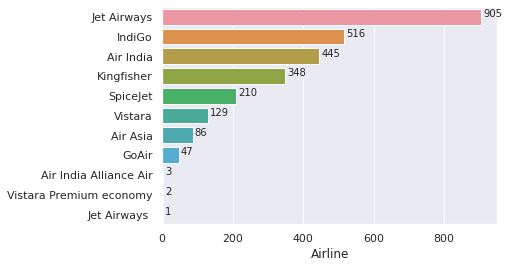

In [ ]:
#Handling Categorical Data
print("Airline")
print("-"*50)
#Graph
#horizontal bar chart to show the count of Airlines
b = test_data["Airline"].value_counts()
a = test_data["Airline"]
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)

Source
--------------------------------------------------


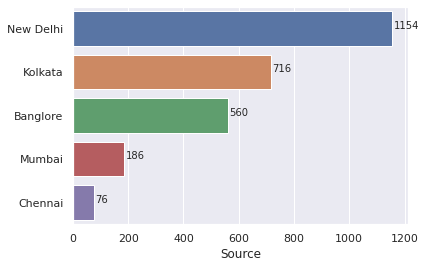

In [ ]:
print("Source")
print("-"*50)
#print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first=True)

#Graph
#horizontal bar chart to show the count of Airlines
b = test_data["Source"].value_counts()
a = test_data["Source"]
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)

Destination
--------------------------------------------------


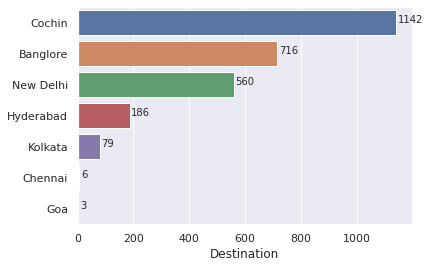

In [ ]:
print("Destination")
print("-"*50)
#print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first=True)

#Graph
#horizontal bar chart to show the count of Airlines
b = test_data["Destination"].value_counts()
a = test_data["Destination"]
p = sns.barplot(y=b.index, x=b)
show_values(p, "h", space=6)

In [ ]:
#drop route column
test_data.drop(["Route"], axis = 1, inplace = True)

In [ ]:
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
test_data.dropna(subset=["Dep_Hours", "Dep_Minutes", "Arrival_Hours", "Arrival_Minutes"], how="all")

,Airline,Source,Destination,Total_Stops,Adults,Children,Infants,Journey Type,Additional_Info,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_hours,Duration_mins
0,Jet Airways,New Delhi,Cochin,1 stop,1,0,0,One Way,No info,6,6,17.0,30.0,4.0,25.0,10,55
1,IndiGo,Kolkata,Banglore,1 stop,1,0,0,Roundtrip,No info,12,5,6.0,20.0,10.0,20.0,4,0
2,Jet Airways,New Delhi,Cochin,1 stop,1,0,0,Roundtrip,In-flight meal not included,21,5,19.0,15.0,19.0,0.0,23,45
3,Kingfisher,New Delhi,Cochin,1 stop,2,1,0,Roundtrip,No info,21,5,8.0,0.0,21.0,0.0,13,0
4,Air Asia,Banglore,New Delhi,non-stop,1,1,0,Roundtrip,No info,24,6,23.0,55.0,2.0,45.0,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,SpiceJet,New Delhi,Cochin,1 stop,2,1,0,Roundtrip,No info,15,4,8.0,45.0,13.0,15.0,4,30
2688,Jet Airways,New Delhi,Cochin,1 stop,2,1,0,Roundtrip,No info,12,6,14.0,0.0,12.0,35.0,22,35
2689,Air India,New Delhi,Cochin,1 stop,2,1,0,Roundtrip,No check-in baggage included,12,6,20.0,15.0,19.0,15.0,23,0
2690,Jet Airways,New Delhi,Cochin,1 stop,2,1,0,Roundtrip,No info,27,5,16.0,0.0,12.0,35.0,20,35


In [ ]:
# As Way is Nominal Categorical data we will perform OneHotEncoding
way = test_data["Journey Type"]
way = pd.get_dummies(way)
way.head()

,One Way,Roundtrip
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
#drop Additional Info column
test_data.drop(['Additional_Info'], axis = 1, inplace = True)

In [ ]:
# Replacing Total_Stops in test data
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenation of the dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [ ]:
#drop columns
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
data_test.dropna(inplace=True,how="all")

In [ ]:
data_test.shape

(10678, 34)

In [ ]:
data_test.head()

,Total_Stops,Adults,Children,Infants,Journey Type,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Kolkata,Mumbai,New Delhi,Chennai,Cochin,Goa,Hyderabad,Kolkata,New Delhi
0,1.0,1.0,0.0,0.0,One Way,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,Roundtrip,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,Roundtrip,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,2.0,1.0,0.0,Roundtrip,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,Roundtrip,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Feature Selection**

Feature selection can be done in multiple ways but there are broadly 3 categories of it:
1. Filter Method
2. Wrapper Method
3. Embedded Method

In [ ]:
data_train.shape

(10674, 36)

In [ ]:
data_train.columns

Index(['Total_Stops', 'Price', 'Adults', 'Children', 'Infants', 'Journey_day',
       'Journey_month', 'Dep_Hours', 'Dep_Minutes', 'Arrival_Hours',
       'Arrival_Minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Banglore', 'Chennai', 'Kolkata', 'Mumbai', 'New Delhi', 'Banglore',
       'Cochin', 'Hyderabad', 'Kolkata', 'New Delhi', 'One Way', 'Roundtrip'],
      dtype='object')

In [ ]:
data_train.dropna(inplace=True, how='any')

In [ ]:
X = data_train.drop(['Price','Airline_Jet Airways Business'], axis=1)
X.head()

,Total_Stops,Adults,Children,Infants,Journey_day,Journey_month,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Banglore,Chennai,Kolkata,Mumbai,New Delhi,Banglore,Cochin,Hyderabad,Kolkata,New Delhi,One Way,Roundtrip
0,0,1,0,0,24,3,22.0,20.0,1.0,10.0,2,50,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,2,1,0,0,1,5,5.0,50.0,13.0,15.0,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,2,1,0,0,9,6,9.0,25.0,4.0,25.0,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,1,1,0,0,12,5,18.0,5.0,23.0,30.0,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1,1,0,0,1,3,16.0,50.0,21.0,35.0,4,45,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

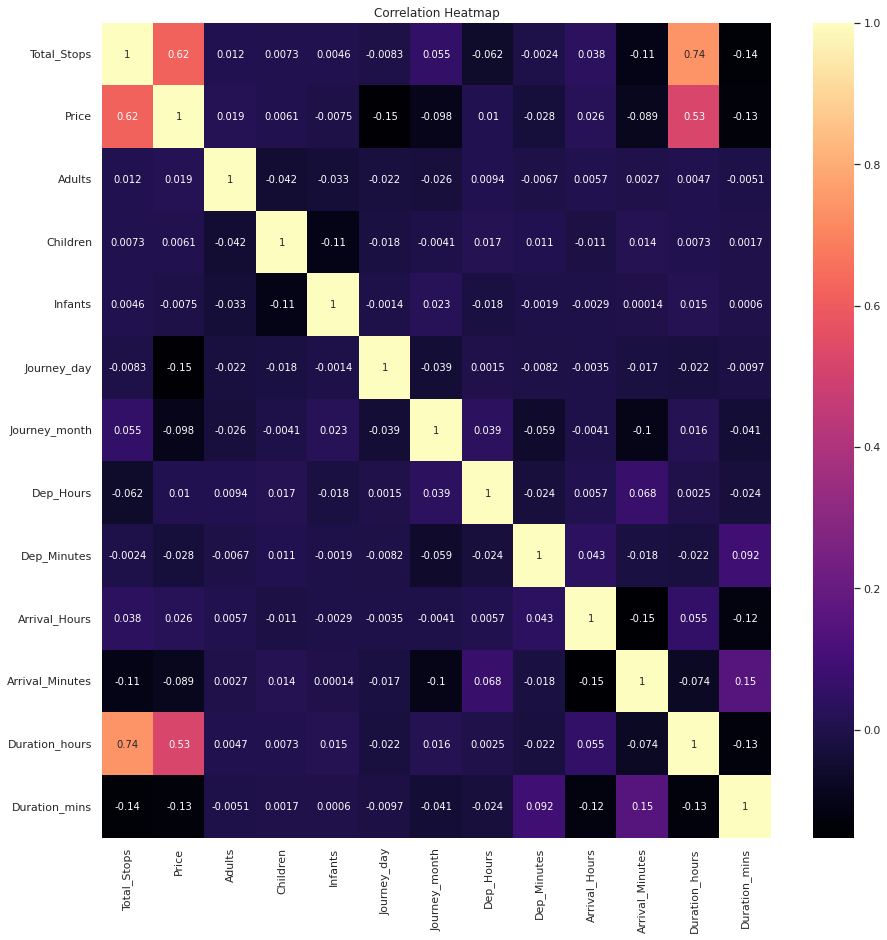

In [ ]:
#create a correlation matrix between independent and dependent attributes
# Correlation heat map analysis
plt.subplots(figsize=(15,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = train_data.corr()
sns.heatmap(corr, cmap='magma',annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor 
selection = ExtraTreesRegressor() 
#define model
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[2.33660183e-01 1.21498140e-03 7.50297316e-03 5.63029180e-03
 1.49860351e-01 6.19298041e-02 2.52406729e-02 2.20153638e-02
 2.74768690e-02 1.98210004e-02 1.49339183e-01 1.82256166e-02
 1.26966578e-02 1.87375885e-03 1.36704197e-02 1.49084132e-01
 2.16789865e-02 9.33539879e-04 4.88635605e-03 7.91044327e-05
 5.35480090e-03 6.58574612e-05 9.28448924e-03 7.74189020e-04
 3.05840192e-03 8.37993324e-03 7.59369445e-03 2.78571759e-03
 1.24852578e-02 8.80725732e-03 6.23775602e-04 1.18112923e-02
 1.09369948e-03 1.06138789e-03]


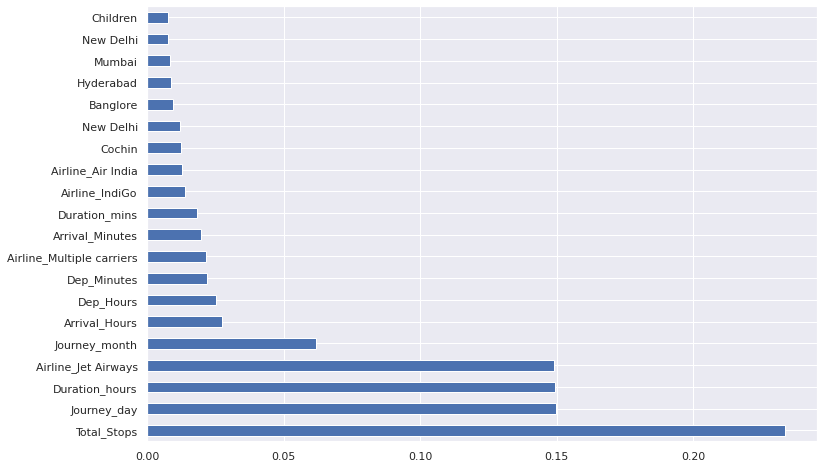

In [ ]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
data_train.shape

(10668, 36)

In [ ]:
data_test.shape

(10678, 34)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(8534, 34)

In [ ]:
X_test.shape

(2134, 34)

In [ ]:
y_train.shape

(8534,)

In [ ]:
y_test.shape

(2134,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9614388106622621

In [ ]:
reg_rf.score(X_test, y_test)

0.8268490959302206

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


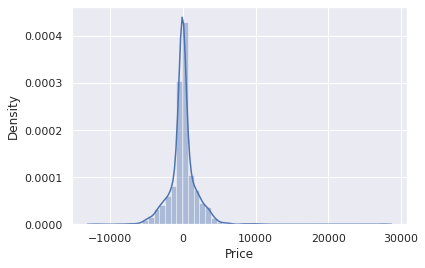

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

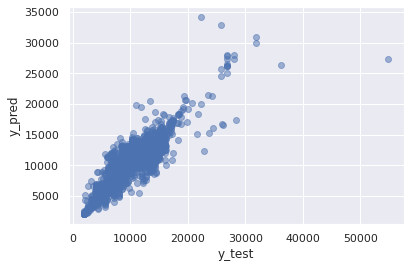

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

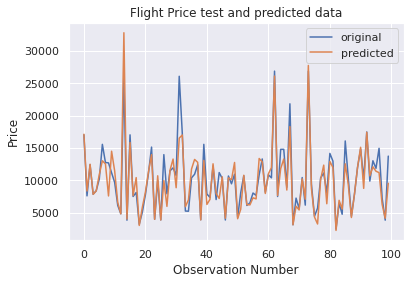

In [ ]:
number_of_observations=100
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1156.1686925588729
MSE: 3607539.350865682
RMSE: 1899.3523503725373


In [ ]:
metrics.r2_score(y_test, y_pred)

0.8268490959302206

# **Hyperparameter Tuning**
Choose following method for hyperparameter tuning

**RandomizedSearchCV --> Fast**

**GridSearchCV** 

Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 14, cv =5, verbose=2)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  22.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  22.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=14,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


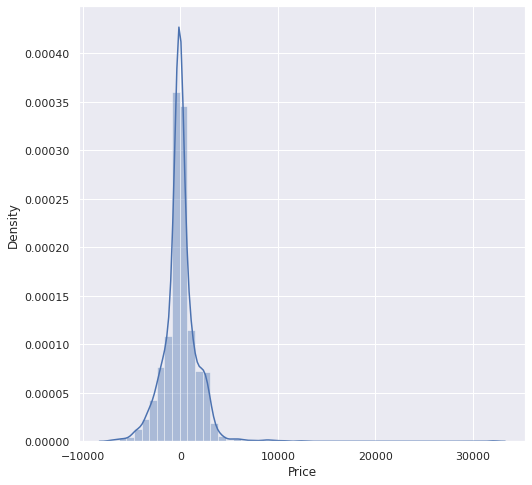

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

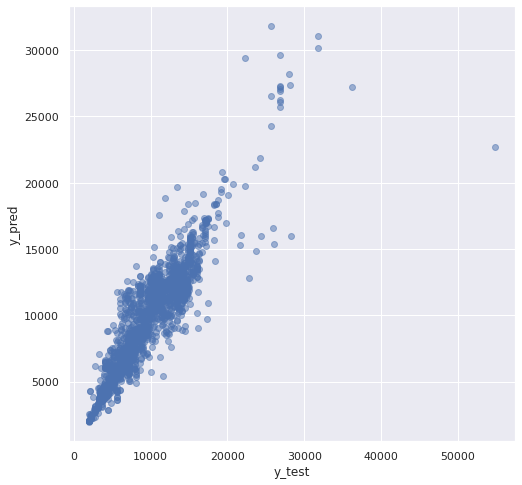

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

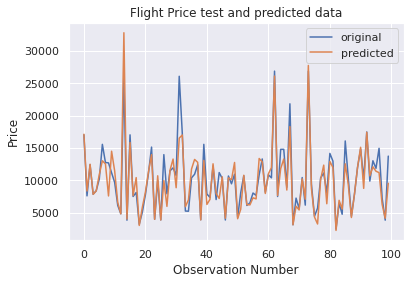

In [ ]:
number_of_observations=100
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1120.652793132003
MSE: 3325897.4525635466
RMSE: 1823.7043215838326


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [ ]:
model = open('/content/flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_predict = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_predict)

0.8268490959302206